### Deliverable 1: Preprocessing the Data for a Neural Network

In [90]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [91]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=["EIN", "NAME"], inplace=True)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [92]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [93]:
# Look at APPLICATION_TYPE value counts for binning
application_df.APPLICATION_TYPE.value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

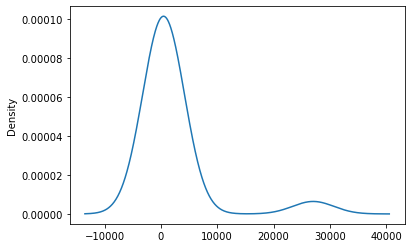

In [94]:
# Visualize the value counts of APPLICATION_TYPE
desnsity_plot = application_df.APPLICATION_TYPE.value_counts()
desnsity_plot.plot.density()

In [95]:
# Determine which values to replace if counts are less than ...?
replace_application = list(desnsity_plot[desnsity_plot < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [96]:
# Look at CLASSIFICATION value counts for binning
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4200        1
C1900        1
C2500        1
C2561        1
C2570        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

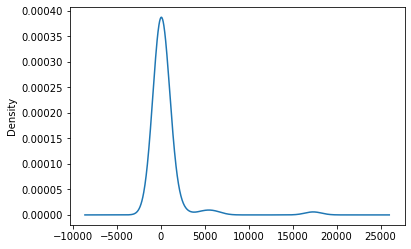

In [97]:
# Visualize the value counts of CLASSIFICATION
desnsity_plot_class = application_df.CLASSIFICATION.value_counts()
desnsity_plot_class.plot.density()

In [98]:
# Determine which values to replace if counts are less than ..?
replace_class = list(desnsity_plot_class[desnsity_plot_class < 500].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [99]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes=="object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [100]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [101]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat, 1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [102]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"], 1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [103]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [104]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layers1 = 60
hidden_nodes_layers2 = 30
hidden_nodes_layers3 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layers1, input_dim=number_input_features, activation="softsign"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layers2, activation="softsign"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layers3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 60)                2700      
_________________________________________________________________
dense_17 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_18 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 21        
Total params: 5,171
Trainable params: 5,171
Non-trainable params: 0
_________________________________________________________________


In [105]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint

os.makedirs("checkpoints_for_optimization/", exist_ok=True)
checkpoint_path = "checkpoints_for_optimization/weights.{epoch:02d}.hdf5"

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                             verbose=1,
                             save_weights_only=True,
                             save_freq='epoch',
                             period=5)

In [106]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 1s 986us/step - loss: 0.5815 - accuracy: 0.7125
Epoch 2/100
804/804 [==============================] - 1s 898us/step - loss: 0.5538 - accuracy: 0.7276
Epoch 3/100
804/804 [==============================] - 1s 899us/step - loss: 0.5460 - accuracy: 0.7354
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5516 - accuracy: 0.7286
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5492 - accuracy: 0.7322

Epoch 00005: saving model to checkpoints_for_optimization\weights.05.hdf5
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5489 - accuracy: 0.7286
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5468 - accuracy: 0.7365
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5441 - accuracy: 0.7317
Epoch 9/100
804/804 [==============================] - 1s 997us/step - loss: 0.5414 - accuracy: 0.7385
Epoch 10

Epoch 71/100
804/804 [==============================] - 1s 984us/step - loss: 0.5340 - accuracy: 0.7408
Epoch 72/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5287 - accuracy: 0.7414: 0s - los
Epoch 73/100
804/804 [==============================] - 1s 925us/step - loss: 0.5314 - accuracy: 0.7440
Epoch 74/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5304 - accuracy: 0.7421
Epoch 75/100
804/804 [==============================] - 1s 909us/step - loss: 0.5340 - accuracy: 0.7393

Epoch 00075: saving model to checkpoints_for_optimization\weights.75.hdf5
Epoch 76/100
804/804 [==============================] - 1s 908us/step - loss: 0.5294 - accuracy: 0.7424
Epoch 77/100
804/804 [==============================] - 1s 974us/step - loss: 0.5333 - accuracy: 0.7383
Epoch 78/100
804/804 [==============================] - 1s 948us/step - loss: 0.5313 - accuracy: 0.7406
Epoch 79/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5250 - ac

In [107]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5658 - accuracy: 0.7234
Loss: 0.5657813549041748, Accuracy: 0.7233819365501404


In [108]:
nn.save("AlphabetSoupCharity_Optimization.h5")

<AxesSubplot:>

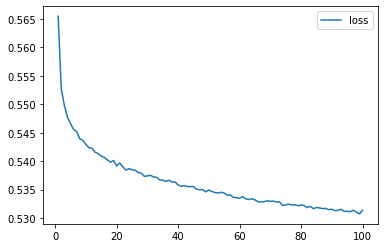

In [109]:
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))
history_df.plot(y="loss")

<AxesSubplot:>

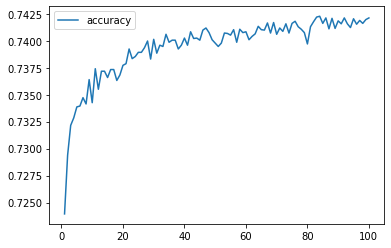

In [110]:
history_df.plot(y="accuracy")